## Regression of Advertising mode vs sales 
### 3 modes of advertising (spend in Kdollars): TV, Radio and Newspaper 
### Sales in (units) vs advertising is modelled here

In [78]:
# Support Vector Regression

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
%matplotlib inline

In [79]:
# Importing the dataset

data = pd.read_csv('Advertising.csv')

In [80]:
data.shape

(200, 5)

In [81]:
data.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [82]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [84]:
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


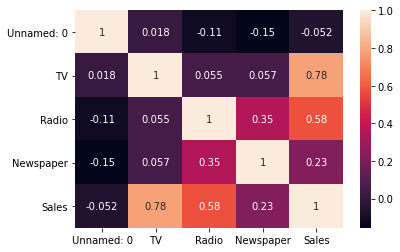

In [85]:
correl=data.corr()
vars=correl.index
sns.heatmap(data[vars].corr(),annot=True);

C:\Users\MuraliSAI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


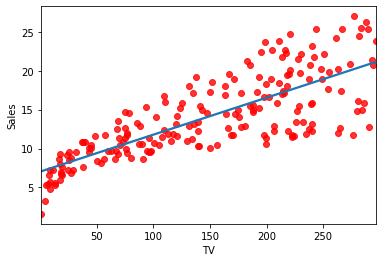

In [86]:
sns.regplot(data.TV, data.Sales, order=1, ci=None, scatter_kws={'color':'r'});

C:\Users\MuraliSAI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


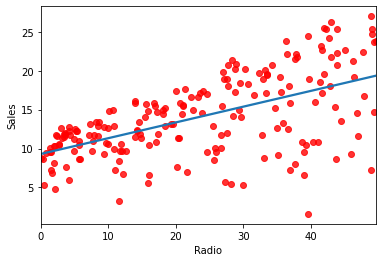

In [87]:
sns.regplot(data.Radio, data.Sales, order=1, ci=None, scatter_kws={'color':'r'});

C:\Users\MuraliSAI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

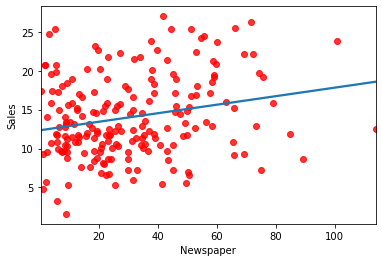

In [88]:
sns.regplot(data.Newspaper, data.Sales, order=1, ci=None, scatter_kws={'color':'r'})

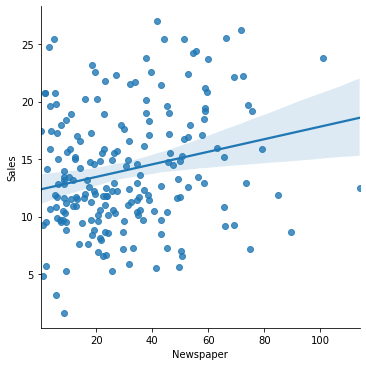

In [89]:
sns.lmplot(x='Newspaper',y='Sales', data=data,fit_reg=True, line_kws=None)

# Multiple Linear Regression

In [90]:
#import statsmodels.api as sm
#import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

In [91]:
regr = LinearRegression()

X = data[['TV']]
y = data[['Sales']]

In [92]:
regr.fit(X,y)

LinearRegression()

In [93]:
Sales_pred = regr.predict(X)

In [94]:
print("The R2 score for UVLR is %f" % (r2_score(y, Sales_pred))) 

The R2 score for UVLR is 0.611875


In [95]:
X = data[['TV', 'Radio', 'Newspaper']]
y = data[['Sales']]

In [96]:
regr.fit(X,y)

LinearRegression()

In [97]:
Sales_pred = regr.predict(X)

In [98]:
print("The R2 score for MVLR is %f" % (r2_score(y, Sales_pred))) 

The R2 score for MVLR is 0.897211


In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [100]:
regr.fit(X_train, y_train)

LinearRegression()

In [101]:
Sales_pred = regr.predict(X_test)

In [102]:
print("The R2 score for MVLR is %f" % (r2_score(y_test, Sales_pred))) 

The R2 score for MVLR is 0.920270


# SVR

In [138]:
# Fitting the SVR model to the dataset
regressor = SVR(kernel = 'linear')
regressor.fit(X,y.values.ravel())

SVR(kernel='linear')

In [139]:
# Predicting a new result with the Support Vector Regression 
y_Pred = regressor.predict(X)

In [140]:
print("The R2 score for SVR is %f" % (r2_score(y, regressor.predict(X)))) 

The R2 score for SVR is 0.891620


In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [163]:
# Fitting the SVR model to the dataset
regressor = SVR(C=100.0,kernel = 'poly', degree=2)
regressor.fit(X_train, y_train.values.ravel())

SVR(C=100.0, degree=2, kernel='poly')

In [164]:
y_Pred = regressor.predict(X_test)

In [165]:
print("The R2 score for SVR is %f" % (r2_score(y_test, regressor.predict(X_test)))) 

The R2 score for SVR is 0.911431


In [166]:
y_Pred1=regressor.predict(X)

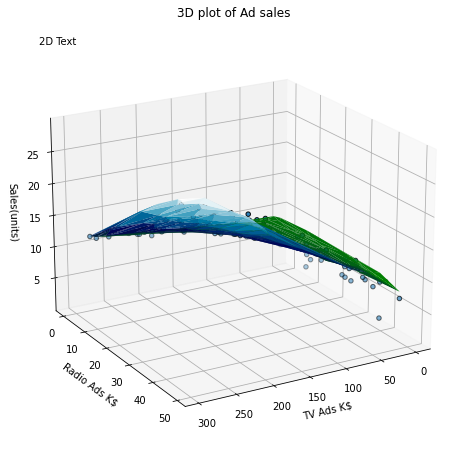

In [167]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
#
## 3D plots for Ad sales
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=60)
ax.scatter(data.TV, data.Radio, data.Sales,edgecolor='k')
#
# Now plot the 3d surface based on SVR prediction
# Note that you can only plot 2 variables at a time
ax.plot_trisurf(data.TV, data.Radio,y_Pred1,cmap='ocean')
ax.text2D(0.05, 0.95, "2D Text", transform=ax.transAxes)
ax.set_xlabel('TV Ads K$')
ax.set_ylabel('Radio Ads K$')
ax.set_zlabel('Sales(units)')
ax.set_title('3D plot of Ad sales')

plt.show()

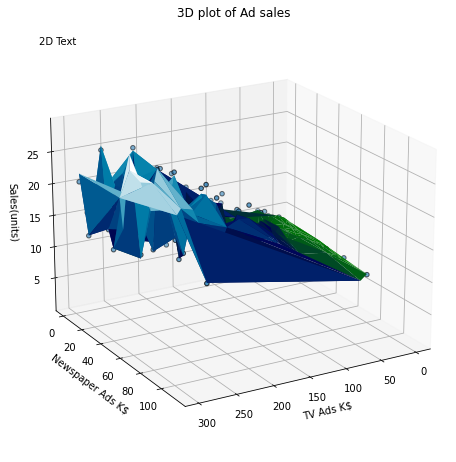

In [168]:
## 3D plots of clusters
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=60)
ax.scatter(data.TV, data.Newspaper, data.Sales,edgecolor='k')
#
# Now plot the 3d surface based on SVR prediction
# Note that you can only plot 2 variables at a time
ax.plot_trisurf(data.TV, data.Newspaper,y_Pred1,cmap='ocean')
ax.text2D(0.05, 0.95, "2D Text", transform=ax.transAxes)
ax.set_xlabel('TV Ads K$')
ax.set_ylabel('Newspaper Ads K$')
ax.set_zlabel('Sales(units)')
ax.set_title('3D plot of Ad sales')

plt.show()